In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

```%matplotlib inline```是一个特殊的jupyter notebook的魔术命令，它用于在jupyter notebook中显示图形输出。它的作用是将生成的图形嵌入到notebook中，而不是在外部窗口中显示。

In [212]:
train = pd.read_csv('../Titanic/train.csv')
test = pd.read_csv('../Titanic/test.csv')


In [213]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [214]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.0000,NaN,S
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S


In [215]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


观察数据
1. 总乘员 891 名
2. label 存活
3. 无缺失feature ：Pclass name sex SibSp Parch Ticket Fare 
4. 少量确实feature : Age Embarked
5. 大量确实feature  : cabin
   
预测和存活率相关的feature：
1. Pclass
2. sex
3. SibSp
4. Parch
5. age
6. Ticket
7. Fare
8. Embarked
9. cabin


In [216]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


下面进行数据可视化

Percentage of males who survived: 18.890814558058924
Percentage of females who survived: 74.20382165605095


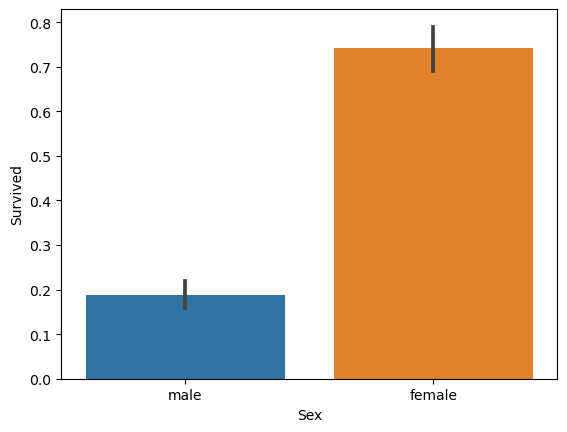

In [217]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)


从上图可见，女性的存活率74%要高于男性18%

Pclass 1 survial percentage  62.96296296296296
Pclass 2 survial percentage  47.28260869565217
Pclass 3 survial percentage  24.236252545824847


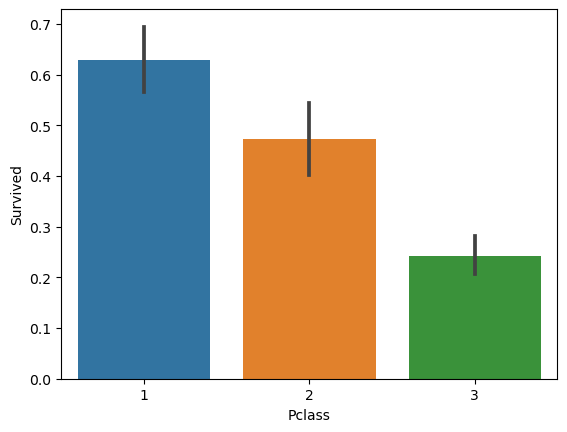

In [218]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
print('Pclass 1 survial percentage ', train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]*100)
print('Pclass 2 survial percentage ', train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1]*100)
print('Pclass 3 survial percentage ', train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1]*100)

高仓位有高存活率

In [219]:
feature_list = train.columns.to_list()[2:]
feature_list.remove('Name')
print(feature_list)


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


为train建立FamilySize column

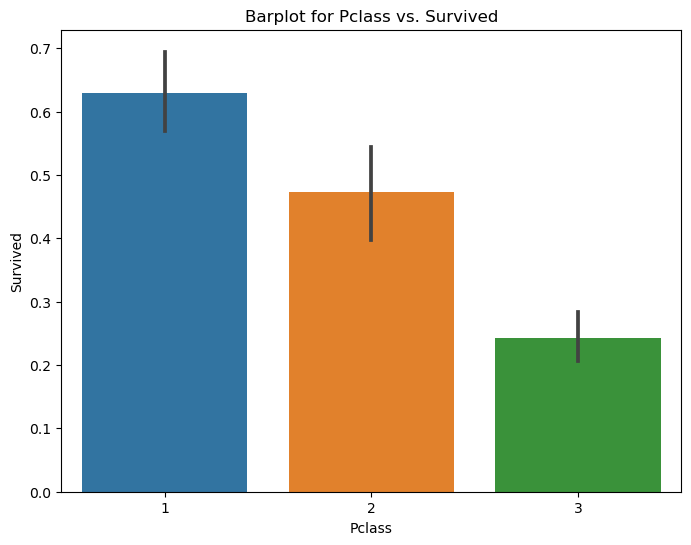

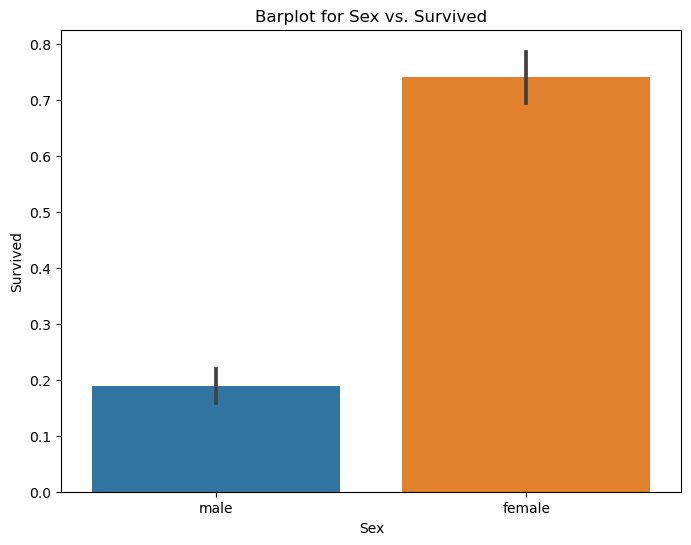

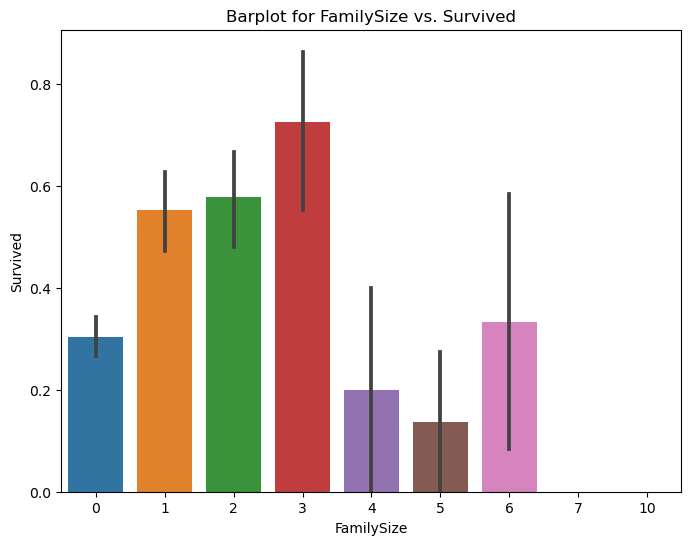

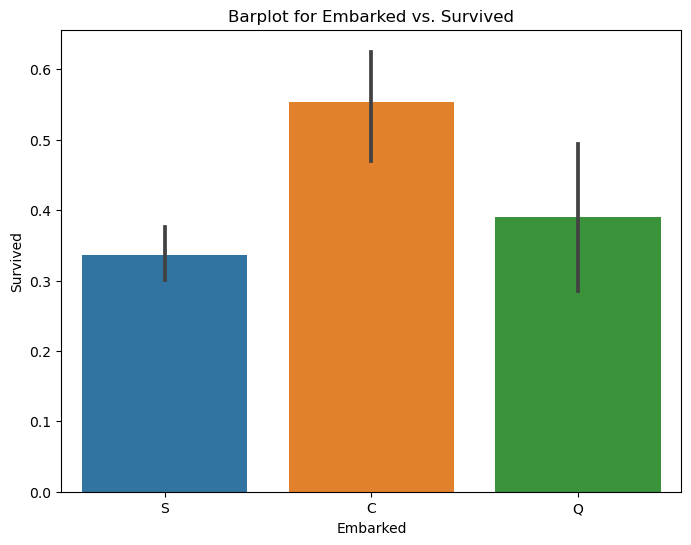

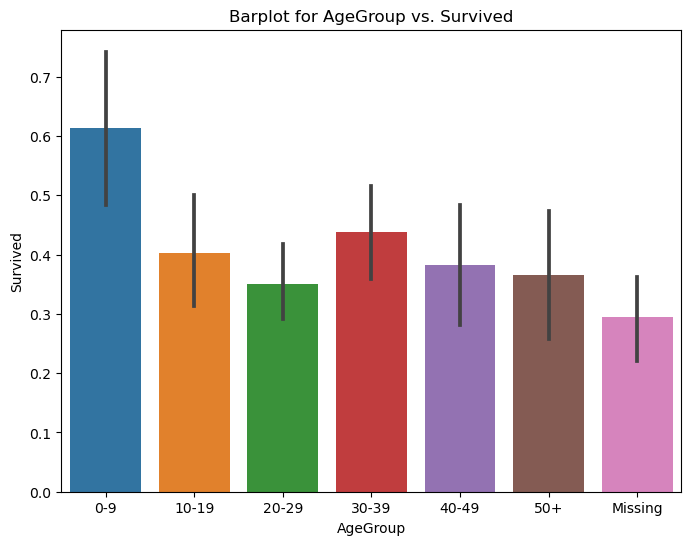

In [220]:
train['FamilySize'] = train['SibSp']+train['Parch']

bins = [0, 10, 20, 30, 40, 50, float("inf")]
labels = ['0-9','10-19','20-29', '30-39', '40-49', '50+']
# 使用pd.cut函数将年龄分组并创建一个新列'AgeGroup'
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, include_lowest=True, right=False)

# 将年龄缺失的数据分配到特殊组"Missing"
train['AgeGroup'].cat.add_categories('Missing', inplace=True)
train['AgeGroup'].fillna('Missing', inplace=True)

feature_list1 = ['Pclass', 'Sex', 'FamilySize', 'Embarked','AgeGroup']
feature_list2 = ['Ticket', 'Fare', 'Cabin']

for feature in feature_list1:
    plt.figure(figsize=(8, 6))  # 设置每个图的大小
    sns.barplot(x=feature, y='Survived', data=train)
    plt.title(f'Barplot for {feature} vs. Survived')
    plt.xlabel(feature)
    plt.ylabel('Survived')

feature list 中的5项feature都有存活率的dependency

下面进行clean test data

In [221]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [222]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeGroup
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN,7
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN,20-29
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN,220
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.904602,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,1.613459,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000,NaN


In [223]:
train = train.drop(['Cabin', 'Ticket', 'Fare'], axis = 1)
test = test.drop(['Cabin', 'Ticket', 'Fare'], axis = 1)

In [224]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN


In [225]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

test数据集的age有null

In [226]:
test['FamilySize'] = test['SibSp']+test['Parch']

bins = [0, 10, 20, 30, 40, 50, float("inf")]
labels = ['0-9','10-19','20-29', '30-39', '40-49', '50+']
# 使用pd.cut函数将年龄分组并创建一个新列'AgeGroup'
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, include_lowest=True, right=False)

# 将年龄缺失的数据分配到特殊组"Missing"
test['AgeGroup'].cat.add_categories('Missing', inplace=True)
test['AgeGroup'].fillna('Missing', inplace=True)

In [227]:
train.describe(include='all')
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,FamilySize,AgeGroup
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,418.000000,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,3,NaN,7
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,S,NaN,20-29
freq,NaN,NaN,1,266,NaN,NaN,NaN,270,NaN,124
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,0.839713,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,1.519072,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,0.000000,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,1.000000,NaN


In [228]:
train = train.drop(['Age','SibSp','Parch','Name'], axis = 1)
test = test.drop(['Age','SibSp','Parch','Name'], axis = 1)

In [229]:
train.describe(include='all')
test.describe(include='all')

,PassengerId,Pclass,Sex,Embarked,FamilySize,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418
unique,NaN,NaN,2,3,NaN,7
top,NaN,NaN,male,S,NaN,20-29
freq,NaN,NaN,266,270,NaN,124
mean,1100.500000,2.265550,NaN,NaN,0.839713,NaN
std,120.810458,0.841838,NaN,NaN,1.519072,NaN
min,892.000000,1.000000,NaN,NaN,0.000000,NaN
25%,996.250000,1.000000,NaN,NaN,0.000000,NaN
50%,1100.500000,3.000000,NaN,NaN,0.000000,NaN
75%,1204.750000,3.000000,NaN,NaN,1.000000,NaN


In [230]:
# 将Sex转换为0和1
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [231]:
print(train['Embarked'].isnull().sum())
print(train['Embarked'].unique())
print(train['Embarked'].value_counts())

2
['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [232]:
#将Embarked转化为0,1,2
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1,'Q':2})
train['Embarked'] = train['Embarked'].fillna(0)
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1,'Q':2})
test['Embarked'] = test['Embarked'].fillna(0)

In [233]:
print(train['AgeGroup'].isnull().sum())
print(train['AgeGroup'].unique())
print(train['AgeGroup'].value_counts())

0
['20-29', '30-39', 'Missing', '50+', '0-9', '10-19', '40-49']
Categories (7, object): ['0-9' < '10-19' < '20-29' < '30-39' < '40-49' < '50+' < 'Missing']
20-29      220
Missing    177
30-39      167
10-19      102
40-49       89
50+         74
0-9         62
Name: AgeGroup, dtype: int64


In [234]:
#将Age Group转化为range(6)
train['AgeGroup'] = train['AgeGroup'].map({'0-9':0, '10-19':1,'20-29':2,'30-39':3,'40-49':4,'50+':5,'Missing':6})
test['AgeGroup'] = test['AgeGroup'].map({'0-9':0, '10-19':1,'20-29':2,'30-39':3,'40-49':4,'50+':5,'Missing':6})


In [235]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Embarked,FamilySize,AgeGroup
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,7.0
top,NaN,NaN,NaN,NaN,NaN,NaN,2.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,220.0
mean,446.000000,0.383838,2.308642,0.352413,0.361392,0.904602,NaN
std,257.353842,0.486592,0.836071,0.477990,0.635673,1.613459,NaN
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN
50%,446.000000,0.000000,3.000000,0.000000,0.000000,0.000000,NaN
75%,668.500000,1.000000,3.000000,1.000000,1.000000,1.000000,NaN


下面开始用SKlearn的模型

In [236]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis = 1)
target = train['Survived']

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state=0)

测试以下模型
1. Gaussian Naive Bayes : 82.68
2. Logistic Regression : 81.01
3. Support Vector Machines :81.01
4. Linear SVC : 79.33
5. Perceptron : 78.21
6. Decision Tree Classifier : 78.21
7. Random Forest Classifier : 78.21
8. KNN or k-Nearest Neighbors : 78.21
9. Stochastic Gradient Descent :77.65
10. Gradient Boosting Classifier :77.65

In [237]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)

acc_gaussion = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_gaussion)

82.68


In [238]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_logreg)

81.01


In [239]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_svc)

81.01


In [240]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_linear_svc)

79.33


In [241]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron  = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_perceptron)

78.21


In [242]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_decisiontree)

78.21


In [243]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_randomforest)

78.21


In [244]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_knn)

78.21


In [245]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_sgd)

76.54


In [246]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gdk = GradientBoostingClassifier()
gdk.fit(x_train, y_train)
gdk.predict(x_val)
acc_gdk = round(accuracy_score(y_pred, y_val)*100,2)
print(acc_gdk)

76.54


Gaussian Naive Bayes : 82.68 为最高准确率
下面用Gaussian Naive Bayes创建submission file

In [249]:
Ids = test['PassengerId']
predictions = gaussian.predict(test.drop(['PassengerId'], axis = 1))

output = pd.DataFrame({'PassengerId':Ids, 'Survived':predictions})
output.to_csv('submission.csv', index = False)

Final score with this notebook : 76.794